## Dataset describtion
Link: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

This data set has 28850 trainning images and 7100 testing images. 
The images are for 7 classes:


1.   Angry
2.   Disgust
3.   Fear 
4.   Happy
5.   Neutral
6.   Sad
7.   Surprise


## Connecting to Google Colab to download the dataset

In [13]:
# !rm -r images

In [2]:
!pip install kaggle #installing kaggle API to directly download the dataset

In [14]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 71 bytes


In [15]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:00<00:00, 307MB/s] 
100% 121M/121M [00:00<00:00, 282MB/s]


Unzipping the dataset

In [16]:
!unzip face-expression-recognition-dataset

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [18]:
# Working with pre trained model 
pretrainedModel = MobileNet( input_shape=(224,224,3), include_top= False )
for layer in pretrainedModel.layers:
  layer.trainable = False
flat = Flatten()(pretrainedModel.output)
# dn1 = Dense(128,activation='relu')(flat)
# drop1 = Dropout(0.5)(dn1)
# dn2 = Dense(64,activation='relu')(flat)
# drop2 = Dropout(0.5)(dn2)
final = Dense(units=7, activation='softmax' )(flat)
#our final model
model = Model(pretrainedModel.input, final)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [19]:
model.compile(optimizer='Adam', loss= categorical_crossentropy , metrics=['accuracy']  )



# Generating Extra Images Using Data Generators

In [20]:
train_datagenerator = ImageDataGenerator( zoom_range = 0.2,  shear_range = 0.2,  horizontal_flip=True, rescale = 1./255)
trainningData = train_datagenerator.flow_from_directory(directory= "/content/images/train",target_size=(224,224),batch_size=32)
#printing how many classes we are having
trainningData.class_indices

Found 28821 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [21]:
val_datagenerator = ImageDataGenerator(rescale = 1./255 )
#printing how many classes we are having
validationData = val_datagenerator.flow_from_directory(directory= "/content/images/validation",target_size=(224,224), batch_size=32)

Found 7066 images belonging to 7 classes.


# Plotting Some Images From the Dataset

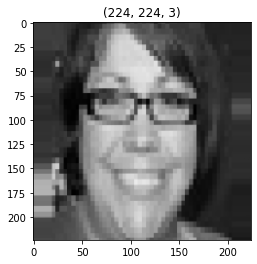

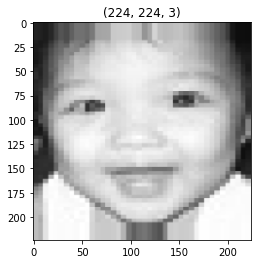

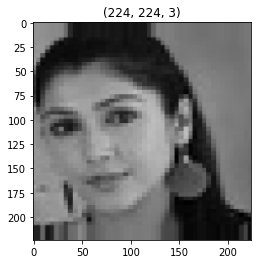

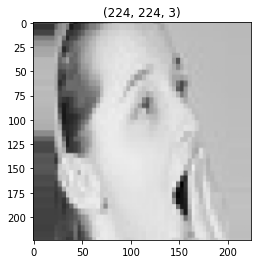

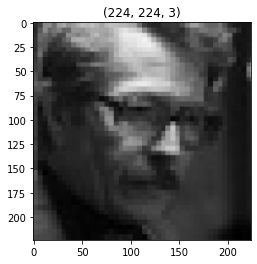

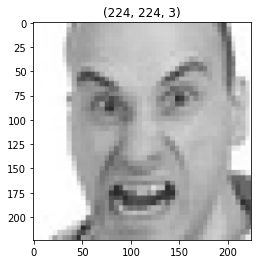

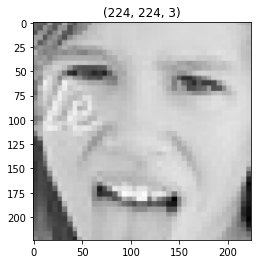

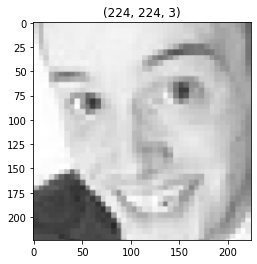

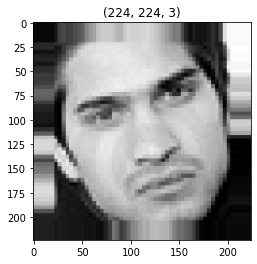

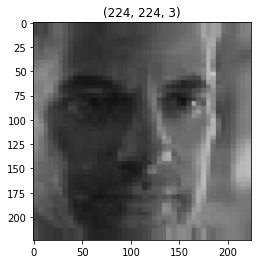

In [28]:
img , lbl = trainningData.next()

def plotImages(img_arr, label):
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

plotImages(img, lbl)

# Adding Checkpoints to the model and tranning the model

In [31]:
# Adding check points to the model 
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Adding Early stopping to the model such that when we reach a certian threshold accuracy we stop the trainning
EarlStop = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')
# Adding Checkpoint to the model so that we can return to it at any time
Check = ModelCheckpoint(filepath="bestModel.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
# puting call back in a list 
call_back = [EarlStop, Check]

# Adding check points to the model 
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Adding Early stopping to the model such that when we reach a certian threshold accuracy we stop the trainning
EarlStop = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='max')
# Adding Checkpoint to the model so that we can return to it at any time
Check = ModelCheckpoint(filepath="bestModel.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
# Saving call back in a list 
call_back = [EarlStop, Check]
histo = model.fit_generator(trainningData,steps_per_epoch= 10,epochs= 30,validation_data= validationData,validation_steps= 8,callbacks=[EarlStop,Check])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 6.0962 - accuracy: 0.4938
Epoch 1: val_accuracy improved from -inf to 0.44531, saving model to bestModel.h5
10/10 [==============================] - 7s 586ms/step - loss: 6.0962 - accuracy: 0.4938 - val_loss: 5.9514 - val_accuracy: 0.4453
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 5.4721 - accuracy: 0.5344
Epoch 2: val_accuracy did not improve from 0.44531
10/10 [==============================] - 5s 467ms/step - loss: 5.4721 - accuracy: 0.5344 - val_loss: 7.5344 - val_accuracy: 0.3906
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 6.0816 - accuracy: 0.4781
Epoch 3: val_accuracy improved from 0.44531 to 0.50781, saving model to bestModel.h5
10/10 [==============================] - 5s 480ms/step - loss: 6.0816 - accuracy: 0.4781 - val_loss: 4.9633 - val_accuracy: 0.5078
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 6.1232 - accuracy: 0.4469
Epoch 4: 

In [32]:

# Saving the best fit model to be used by the video recorder
from keras.models import load_model
model = load_model("/content/bestModel.h5")

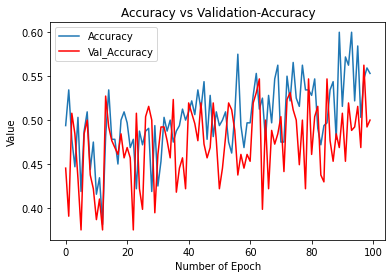

In [38]:
myHistory =  histo.history
plt.plot(myHistory['accuracy'],label="Accuracy")
plt.plot(myHistory['val_accuracy'] , c = "red",label="Val_Accuracy")
plt.xlabel("Number of Epoch")
plt.ylabel("Value")
plt.title("Accuracy vs Validation-Accuracy")
plt.legend()

plt.show()

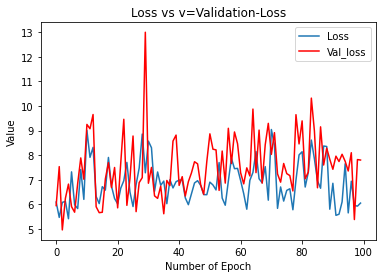

In [39]:
plt.plot(myHistory['loss'],label="Loss")
plt.plot(myHistory['val_loss'] , c = "red",label="Val_loss")
plt.title("Loss vs v=Validation-Loss")
plt.legend()
plt.xlabel("Number of Epoch")
plt.ylabel("Value")
plt.show()

In [27]:
# just to map o/p values 
op = dict(zip( trainningData.class_indices.values(), trainningData.class_indices.keys()))